In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rebound
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from scipy import optimize
import vanillaWH
import vanillaWH_tools

%matplotlib inline

In [3]:
# initial conditions

# particle array as [rx, ry, vx, vy, m]
p0 = np.array([0., 0., 0., 0., 0., 0., 1.])
p1 = np.array([1., 0., 0., 0., 1., 0., 1e-3])
p2 = np.array([1., 0., 0., 0., 1., 0., 0.])
sim = np.stack([p0, p1])
masses = sim[:,-1]

sim = vanillaWH_tools.move_to_com(sim)
print(sim)

timestep = 0.1
N_steps = 1000
orbit_soln = np.zeros((3, 3, N_steps)) # [object, position, N_steps]
orbit_soln[0, 0, 0], orbit_soln[0, 1, 0] = sim[0,0], sim[0,1]
orbit_soln[1, 0, 0], orbit_soln[1, 1, 0] = sim[1,0], sim[1,1]
#orbit_soln[2, 0, 0], orbit_soln[2, 1, 0] = sim[2,0], sim[2,1]
    
start = time.time()

for i in range(N_steps):
    
    # drift
    simj = vanillaWH_tools.inertial_to_jacobi(sim)
    simj = vanillaWH.drift(simj, sim, object_num = 1, h=timestep)
    sim = vanillaWH_tools.jacobi_to_inertial(simj, masses)
    
    # kick
    #sim = kick(sim, h=timestep)

    orbit_soln[0, 0, i] = sim[0,0]
    orbit_soln[0, 1, i] = sim[0,1]
    orbit_soln[0, 2, i] = sim[0,2]
    
    orbit_soln[1, 0, i] = sim[1,0]
    orbit_soln[1, 1, i] = sim[1,1]
    orbit_soln[1, 2, i] = sim[1,2]
    
    #orbit_soln[2, 0, i] = sim[2,0]
    #orbit_soln[2, 1, i] = sim[2,1]
    #orbit_soln[2, 2, i] = sim[2,2]
    
end = time.time()

print('time to integrate =', np.round(end - start, 1), 's')

[[-9.99000999e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.99000999e-04  0.00000000e+00  1.00000000e+00]
 [ 9.99000999e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.99000999e-01  0.00000000e+00  1.00000000e-03]]
time to integrate = 0.2 s


In [4]:
sim = rebound.Simulation()
sim.integrator='whfast'
sim.dt = timestep
sim.add(m=1.)
sim.add(m=1e-3, x=1., vy=1.)
#sim.add(m=1e-3, x=1., vy=1.)
#sim.add(m=1e-3, x=1.1, vy=0.7)

sim.move_to_com()

orbit_soln_rebound = np.zeros((3, 3, N_steps))
diff0, diff1, diff2 = np.zeros(N_steps), np.zeros(N_steps), np.zeros(N_steps)

for i in range(N_steps):
    sim.step() 
    
    orbit_soln_rebound[0,0,i] = sim.particles[0].x
    orbit_soln_rebound[0,1,i] = sim.particles[0].y
    orbit_soln_rebound[0,2,i] = sim.particles[0].z
    orbit_soln_rebound[1,0,i] = sim.particles[1].x 
    orbit_soln_rebound[1,1,i] = sim.particles[1].y
    orbit_soln_rebound[1,2,i] = sim.particles[1].z
    #orbit_soln_rebound[2,0,i] = sim.particles[2].x 
    #orbit_soln_rebound[2,1,i] = sim.particles[2].y
    #orbit_soln_rebound[2,2,i] = sim.particles[2].z
    
    dx0 = orbit_soln_rebound[0,0,i]-orbit_soln[0,0,i]
    dy0 = orbit_soln_rebound[0,1,i]-orbit_soln[0,1,i]
    dz0 = orbit_soln_rebound[0,2,i]-orbit_soln[0,2,i]
    diff0[i] = np.sqrt(dx0**2 + dy0**2 + dz0**2)
    
    dx1 = orbit_soln_rebound[1,0,i]-orbit_soln[1,0,i]
    dy1 = orbit_soln_rebound[1,1,i]-orbit_soln[1,1,i]
    dz1 = orbit_soln_rebound[1,2,i]-orbit_soln[1,2,i]
    diff1[i] = np.sqrt(dx1**2 + dy1**2 + dz1**2)
    
    #dx2 = orbit_soln_rebound[2,0,i]-orbit_soln[2,0,i]
    #dy2 = orbit_soln_rebound[2,1,i]-orbit_soln[2,1,i]
    #dz2 = orbit_soln_rebound[2,2,i]-orbit_soln[2,2,i]
    #diff2[i] = np.sqrt(dx2**2 + dy2**2 + dz2**2)


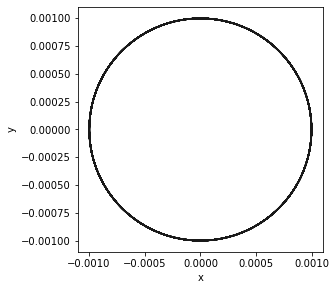

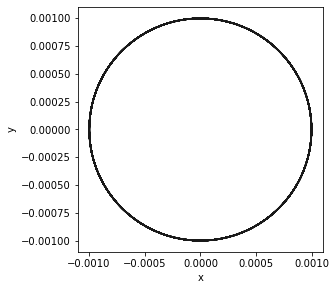

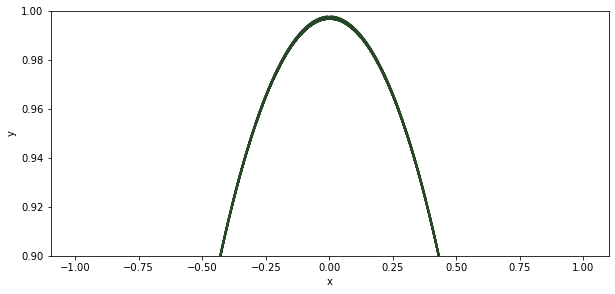

In [5]:
plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln[0,0], orbit_soln[0,1], alpha=0.9, c='black')
#plt.plot(orbit_soln[1,0], orbit_soln[1,1], alpha=0.6, c='black')
#plt.plot(orbit_soln[2,0], orbit_soln[2,1], alpha=0.3, c='black')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10,4.5))
plt.plot(orbit_soln_rebound[0,0], orbit_soln_rebound[0,1], alpha=0.9, c='black')
#plt.plot(orbit_soln_rebound[1,0], orbit_soln_rebound[1,1], alpha=0.6, c='black')
#plt.plot(orbit_soln[2,0], orbit_soln[2,1], alpha=0.3, c='black')
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10,4.5))
#plt.plot(orbit_soln_rebound[0,0], orbit_soln_rebound[0,1], alpha=0.9, c='black')
plt.plot(orbit_soln[1,0], orbit_soln[1,1], alpha=0.6, c='green')
plt.plot(orbit_soln_rebound[1,0], orbit_soln_rebound[1,1], alpha=0.6, c='black')
plt.ylim(0.9,1.0)
#plt.plot(orbit_soln[2,0], orbit_soln[2,1], alpha=0.3, c='black')
#plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
#plt.legend(loc='lower right')
plt.show()

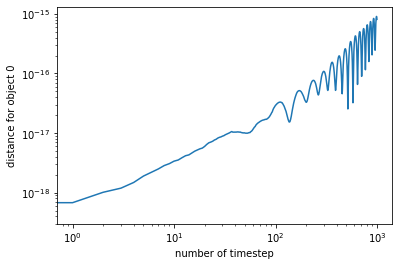

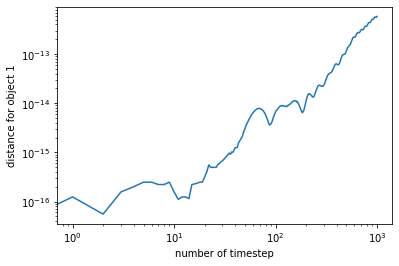

In [6]:
plt.plot(diff0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of timestep')
plt.ylabel('distance for object 0')
plt.show()

plt.plot(diff1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of timestep')
plt.ylabel('distance for object 1')
plt.show()

#plt.plot(diff2)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('number of timestep')
#plt.ylabel('distance for object 1')
#plt.show()

In [ ]:
# particle array as [rx, ry, vx, vy, m]
p0 = np.array([1., 0., 0., 0., 0., 0., 1.])
p1 = np.array([5., 0., 0., 0., 1., 0., 1.])
p2 = np.array([9., 0., 0., 0., 0.7, 0., 1.])
sim = np.stack([p0, p1, p2])

sim = vanillaWH.move_to_com(sim)

print('sim before transform', sim[:,:3])

simj = vanillaWH.inertial_to_jacobi(sim)

print('simj after transform', simj[:,:3])

sim = vanillaWH.jacobi_to_inertial(simj, sim)

print('sim after transform back', sim[:,:3])

In [ ]:
sim = rebound.Simulation()

sim.add(m=1.)
sim.add(m=1., x=1., vy=1.)
sim.add(m=1., x=2., vy=1.)

sim.move_to_com()

print(sim.particles[0].x,sim.particles[0].y,sim.particles[1].x,sim.particles[1].y, sim.particles[2].x,sim.particles[2].y)

sim.particles[0].jacobi_com.x, sim.particles[0].jacobi_com.y, sim.particles[1].jacobi_com.x, sim.particles[1].jacobi_com.y, sim.particles[2].jacobi_com.x, sim.particles[2].jacobi_com.y
# sim.

In [ ]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1e-3, x=1., vy=1.)
sim.add(m=1e-3, x=1.1, vy=0.7)

sim.move_to_com()

sim.integrate(1) 


In [ ]:
fig, ax = rebound.OrbitPlot(sim)

#plt.legend(loc='lower right')
#plt.axis('scaled')
plt.show()

In [ ]:
help(rebound.OrbitPlot)